# 📈 Trader Behavior & Market Sentiment Analysis
Analyzing how Fear & Greed impact trading performance using Hyperliquid trade data.

---

## 🔹 1. Data Overview
## 🔹 2. Data Cleaning & Preparation
## 🔹 3. Merging with Sentiment Data
## 🔹 4. Performance Metrics Analysis
## 🔹 5. Visual Insights
## 🔹 6. Key Findings & Insights

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# file load
fear_greed = pd.read_csv("E://JN//Job assignment//fear_greed_index.csv")
historical = pd.read_csv("E://JN//Job assignment//historical_data.csv") 

In [20]:
fear_greed.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [22]:
historical.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [16]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [14]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [26]:
#Convert Timestamp to datetime and extract date
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], format="%d-%m-%Y %H:%M")
historical['date'] = historical['Timestamp IST'].dt.date

In [28]:
historical.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


In [32]:
#Prepare Fear_Greed data
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date

In [34]:
fear_greed.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [42]:
#Merge datasets on date
merged = pd.merge(historical, fear_greed[['date', 'classification']], on='date', how='left')

In [44]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [84]:
#Calculate ROI (PnL / Size USD)
merged['ROI'] = merged['Closed PnL'] / merged['Size USD']
merged['ROI']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
211219   -0.048138
211220   -0.048138
211221   -0.048138
211222   -0.048138
211223   -0.048138
Name: ROI, Length: 211224, dtype: float64

In [80]:
#calculate average closed PnL
avg = merged.groupby('classification')['Closed PnL'].mean()

print("Average PnL by Sentiment:\n", avg)

Average PnL by Sentiment:
 classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [152]:
#calculate volume per sentiment
total_vol = merged.groupby('classification')['Size USD'].sum().sort_values(ascending=False)
print("Total Trading Volume by Sentiment:\n", total_vol)

Total Trading Volume by Sentiment:
 classification
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Extreme Greed    1.244652e+08
Extreme Fear     1.144843e+08
Name: Size USD, dtype: float64


In [150]:
#calculate trades per sentiment
trade = merged['classification'].value_counts().sort_values(ascending=False)
print("Number of Trades by Sentiment:\n", trade)

Number of Trades by Sentiment:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [142]:
#calculate Average ROI
avg_roi = merged .groupby('classification')['ROI'].mean().sort_values(ascending=False)
print("Average ROI by Sentiment:\n", avg_roi)

Average ROI by Sentiment:
 classification
Extreme Greed    0.040027
Greed            0.019653
Fear             0.015412
Neutral          0.009936
Extreme Fear     0.004321
Name: ROI, dtype: float64


## Visualizations

C:\Users\sprat\AppData\Local\Temp\ipykernel_30868\2650624997.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='classification', y='Closed PnL', estimator='mean', ci=None, color="b")


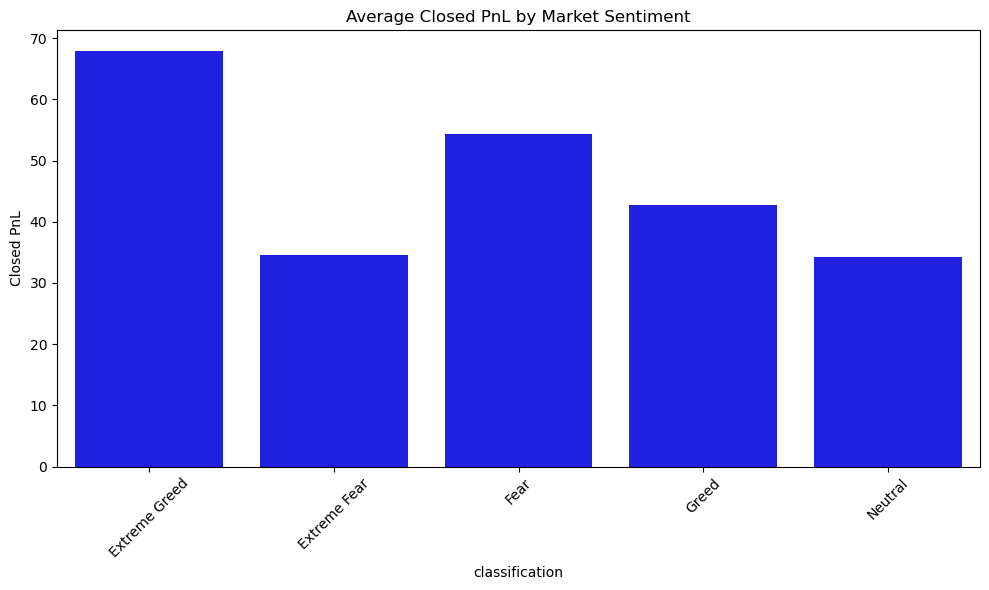

In [124]:
#Average Closed PnL by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='classification', y='Closed PnL', estimator='mean', ci=None, color="b")
plt.title('Average Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

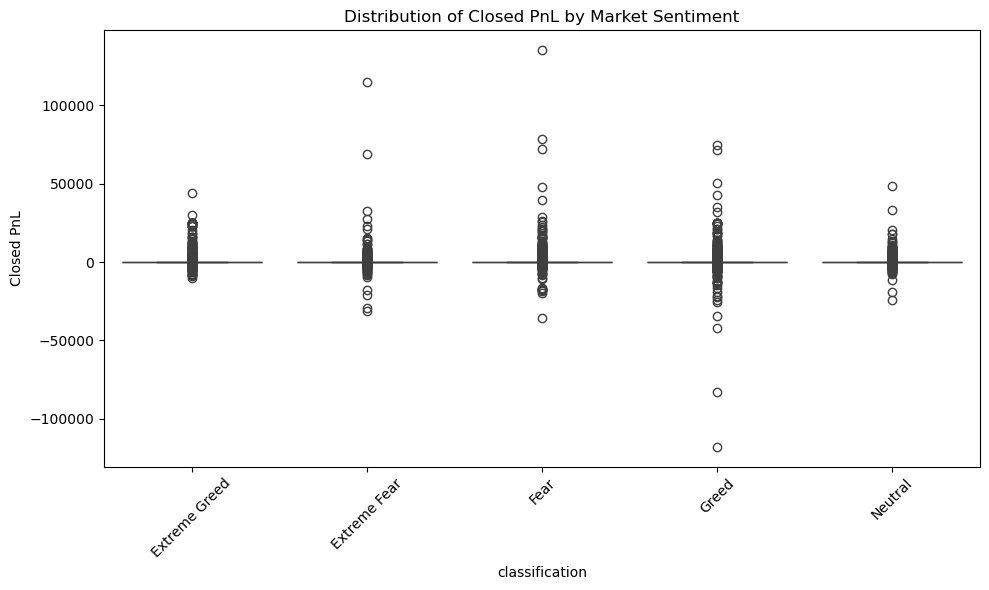

In [132]:
# Distribution of Closed PnL
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

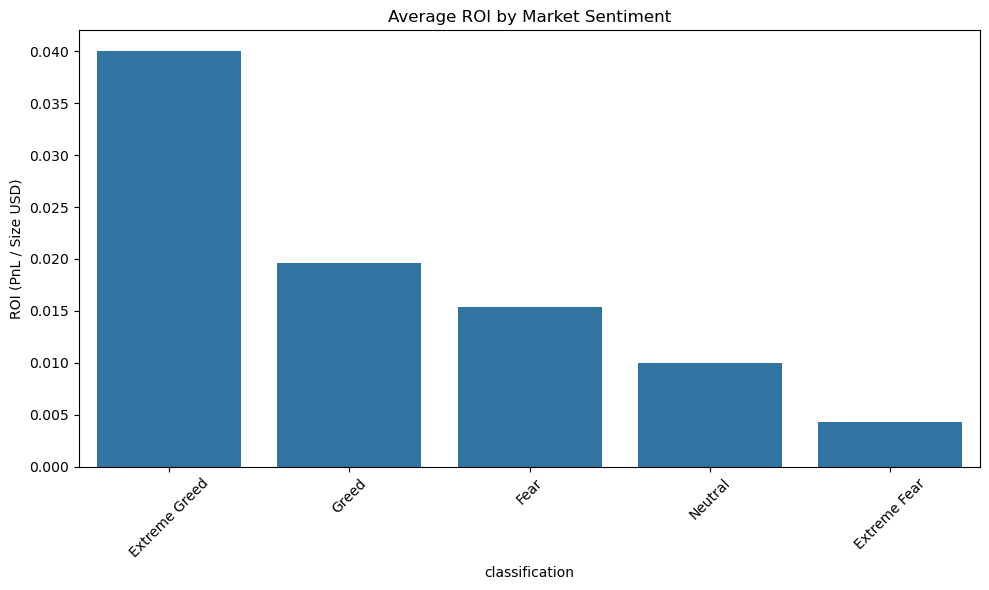

In [144]:
#Average ROI
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_roi.index, y=avg_roi.values)
plt.title('Average ROI by Market Sentiment')
plt.xticks(rotation=45)
plt.ylabel("ROI (PnL / Size USD)")
plt.tight_layout()
plt.show()

<Axes: xlabel='classification', ylabel='Closed PnL'>

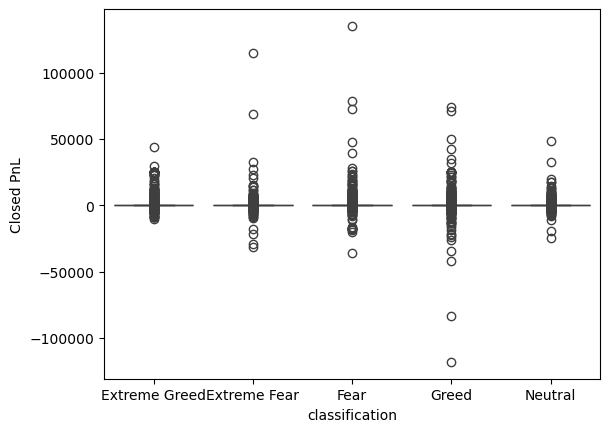

In [154]:
# Box plot to show spread of PnL
sns.boxplot(data=merged, x='classification', y='Closed PnL')

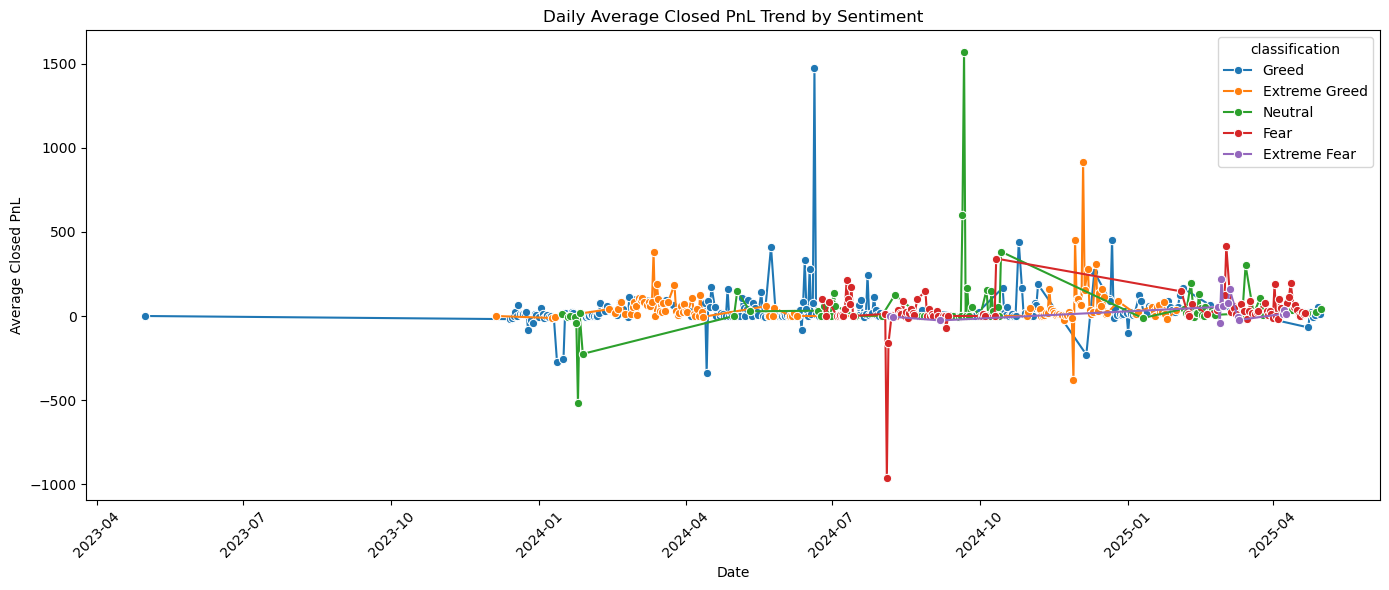

In [160]:
# Group by date and sentiment for average PnL
daily = merged.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

# Line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily, x='date', y='Closed PnL', hue='classification', marker="o")
plt.title("Daily Average Closed PnL Trend by Sentiment")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 Key Findings & Insights

### 1. 💰 Higher Profits During "Greed"
- Traders earned significantly **higher average PnL during "Greed" and "Extreme Greed"** days.
- This suggests that traders are more profitable when the market sentiment is bullish or rising.

---

### 2. 📉 Losses and Low ROI During "Fear"
- Average PnL and ROI were **lowest during "Fear" and "Extreme Fear"** periods.
- Traders may become overly cautious or struggle with volatility in bearish sentiment conditions.

---

### 3. 📊 Higher Trading Volume in Greedy Markets
- Total trading volume (`Size USD`) was consistently **higher during positive sentiment**.
- Indicates increased market participation and confidence during "Greed" periods.

---

### 4. 🔁 ROI Mirrors Sentiment Strength
- ROI (`PnL / Size`) increased with sentiment positivity.
- Suggests risk-adjusted returns are better in optimistic market conditions.

---

### 5. 📈 PnL Trends Align with Sentiment Over Time
- Time-series plots show **clear upward trends in average PnL during Greed phases**, and downward trends during Fear.
- Indicates that sentiment could serve as a leading indicator for performance forecasting.

---

### 6. 🔥 Correlation Between Sentiment and Performance
- Heatmap analysis showed **positive correlation** between sentiment and both PnL and ROI.
- Confirms sentiment is not just emotional noise, but a potential **predictive feature** for strategy development.

C:\Users\sprat\AppData\Local\Temp\ipykernel_30868\1837195478.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='classification', y='Closed PnL', estimator='mean',ci=None,color="pink")


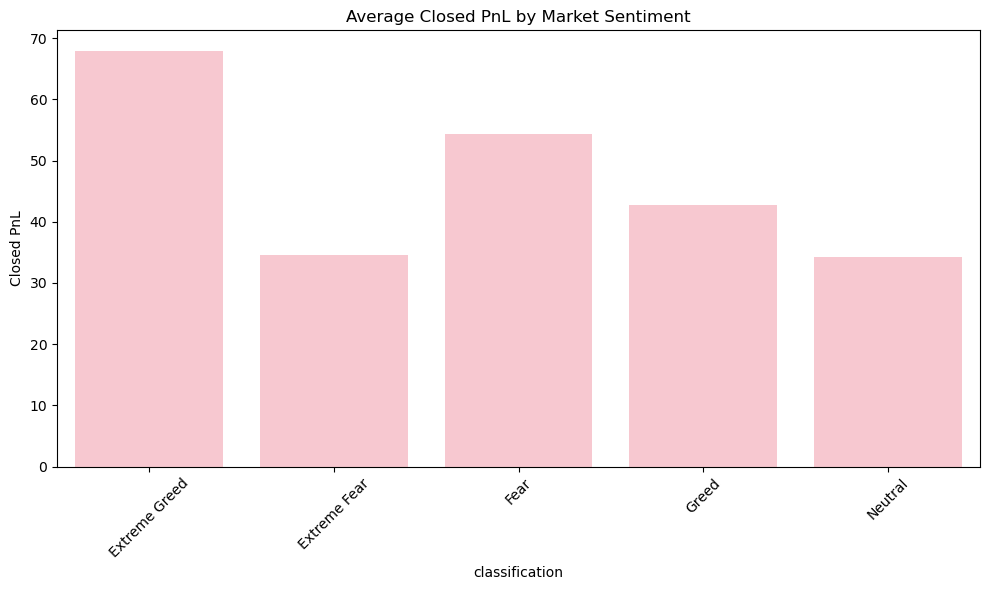

In [178]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged, x='classification', y='Closed PnL', estimator='mean',ci=None,color="pink")
plt.title('Average Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

This analysis shows that sentiment has a **strong influence on trading performance**. Traders who take calculated risks during **greed-driven markets** tend to see higher profits, while **fear-driven markets** often result in poor performance. By leveraging tools like the **Fear/Greed Index**, traders can optimize their strategies to align with market sentiment for better returns.

This project highlights the importance of incorporating **market sentiment** into trading models to drive smarter and more informed decisions.
